12/14/18
Data generated by Wenchao

## Import Library

In [3]:
# Project specific libraries
library(limma)
library(edgeR)
library(DESeq2)
library(reshape2)
library(ggplot2)

In [4]:
# Import Lib for exixting scripts
library(devtools)
library(roxygen2)

#### Working directory

In [5]:
# DFCI
setwd ("Z:/Ajit/wenchao data")

## Import data

In [97]:
data <- read.table("RawData_modified.txt", header=T, sep="\t")
pdata <- read.table("pdata_modified.txt", header=T, sep="\t")

### Pre-processing

In [98]:
# Remove transcripts that are not expressed in 3 or more samples
#data <- data[rowSums(data[2:ncol(data)])!=0, ]
data <- data[apply(data[2:ncol(data)] == 0, 1, sum) <= 3, ]
dim (data)

[1] 9694   17

In [99]:
# Merge multiple transcripts into one gene
# Import function
source_url("https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/r_scripts/collapse_to_one_gene.R")
# Merge
data_merged <- genesummary (data)
dim(data_merged)
head(data_merged)

SHA-1 hash of file is a0c6a4622daa5b3775f335059a29d6224d9f4032


[1] 9694   16

,P1_DMSO,P2_DMSO,P3_DMSO,P1_Len,P2_Len,P1_Pom,P2_Pom,R1_DMSO,R2_DMSO,R3_DMSO,R1_Len,R2_Len,R3_Len,R1_Pom,R2_Pom,R3_Pom
AAAS,23,15,8,9,8,11,12,12,14,17,8,2,9,13,14,23
AACS,12,12,11,6,6,10,21,4,5,3,3,1,16,9,1,6
AAED1,20,25,20,12,9,14,17,17,11,8,11,3,16,14,16,6
AAGAB,8,11,14,7,9,12,8,7,19,10,2,5,20,9,12,14
AAK1,17,17,12,15,24,13,13,13,12,6,15,9,6,10,17,13
AAMDC,4,3,3,3,4,8,5,2,2,2,1,0,3,3,3,4


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


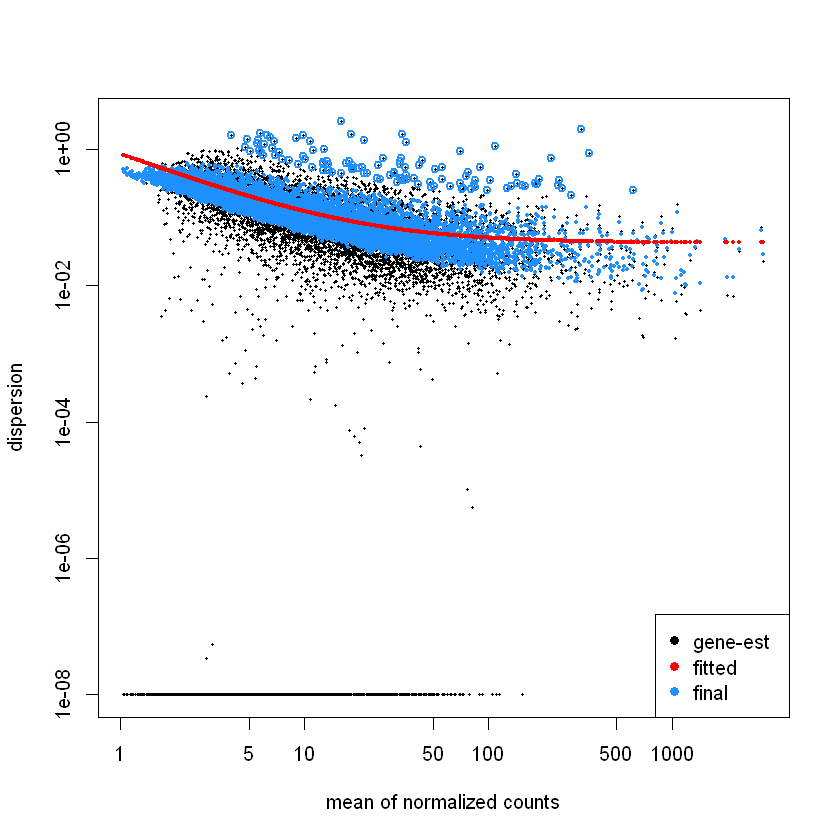

In [100]:
# Normalise data using limma-voom
# Create design matrix
#design <- model.matrix(~ pdata$Resistance)
# Apply voom transformation
#nf <- calcNormFactors(data_merged)
#v <- voom(data_merged, design, lib.size=colSums(data_merged)*nf, normalize.method="quantile", plot=TRUE)

# Normalise data using DE-Seq
dds <- DESeqDataSetFromMatrix(countData = data_merged, colData = pdata, design = ~ Treatment)
dds <- DESeq(dds)
plotDispEsts(dds)

# EdgeR normalisation
#dge <- DGEList(counts=data_merged, group=pdata$Resistance)
# Normalize by total count
#dge <- calcNormFactors(dge)
# Create the contrast matrix
#design.mat <- model.matrix(~ 0 + dge$samples$group)
#colnames(design.mat) <- levels(dge$samples$group)
# Estimate dispersion parameter for GLM
#dge <- estimateGLMCommonDisp(dge, design.mat)
#dge <- estimateGLMTrendedDisp(dge, design.mat, method="power")
#dge<- estimateGLMTagwiseDisp(dge,design.mat)
#plotBCV(dge)

In [101]:
# Extract the normalised data from the deseq file
n_data <- data.frame(counts(dds, normalized=TRUE))
head(n_data)

,P1_DMSO,P2_DMSO,P3_DMSO,P1_Len,P2_Len,P1_Pom,P2_Pom,R1_DMSO,R2_DMSO,R3_DMSO,R1_Len,R2_Len,R3_Len,R1_Pom,R2_Pom,R3_Pom
AAAS,19.434752,12.492877,7.053568,8.053832,6.302607,9.402950,9.90636,9.796145,10.895814,17.699933,19.581603,4.519841,7.563086,10.800102,12.9439680,20.149431
AACS,10.139871,9.994302,9.698656,5.369221,4.726955,8.548136,17.33613,3.265382,3.891362,3.123518,7.343101,2.259920,13.445487,7.476993,0.9245691,5.256373
AAED1,16.899784,20.821462,17.633920,10.738443,7.090433,11.967391,14.03401,13.877873,8.560996,8.329380,26.924704,6.779761,13.445487,11.630879,14.7931063,5.256373
AAGAB,6.759914,9.161443,12.343744,6.264092,7.090433,10.257763,6.60424,5.714418,14.787176,10.411725,4.895401,11.299602,16.806859,7.476993,11.0948297,12.264871
AAK1,14.364817,14.158594,10.580352,13.423054,18.907821,11.112577,10.73189,10.612491,9.339269,6.247035,36.715506,20.339283,5.042058,8.307770,15.7176755,11.388809
AAMDC,3.379957,2.498575,2.645088,2.684611,3.151304,6.838509,4.12765,1.632691,1.556545,2.082345,2.447700,0.000000,2.521029,2.492331,2.7737074,3.504249



Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

No id variables; using all as measure variables
No id variables; using all as measure variables
Warning message:
"Removed 4128 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 4128 rows containing non-finite values (stat_boxplot)."

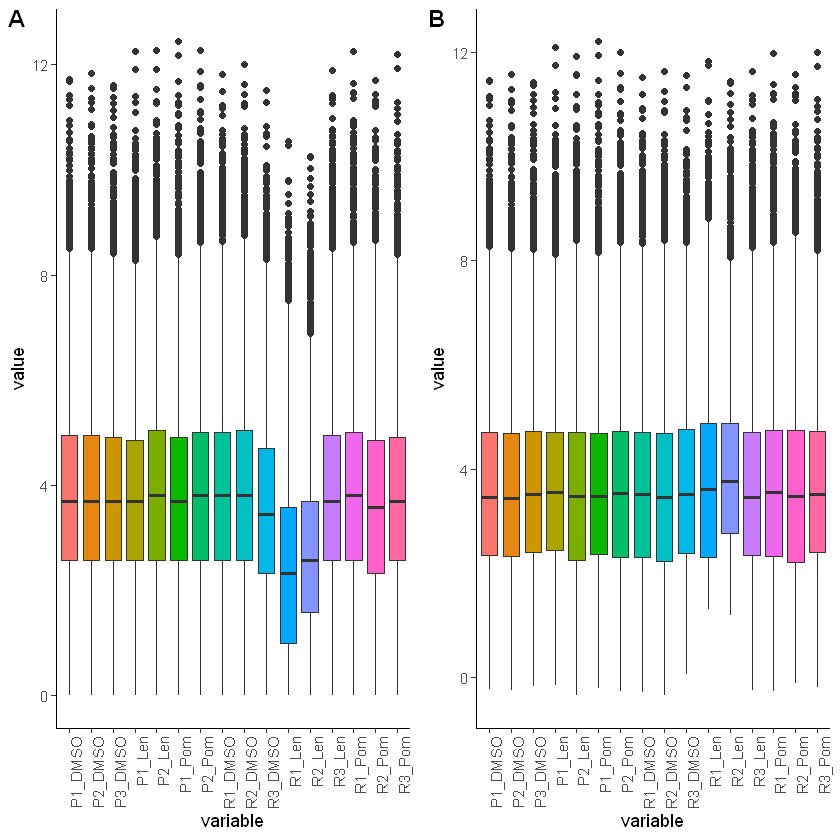

In [111]:
# Vizulaize expression profile before and after normalization
library(cowplot)

p1 <- ggplot(data = melt(log2(data_merged)), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))+
      theme_classic()+
      theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))
# After normalization
p2 <- ggplot(data = melt(log2(n_data)), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))+
      theme_classic()+
      theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))

plot_grid(p1, p2, labels = "AUTO")


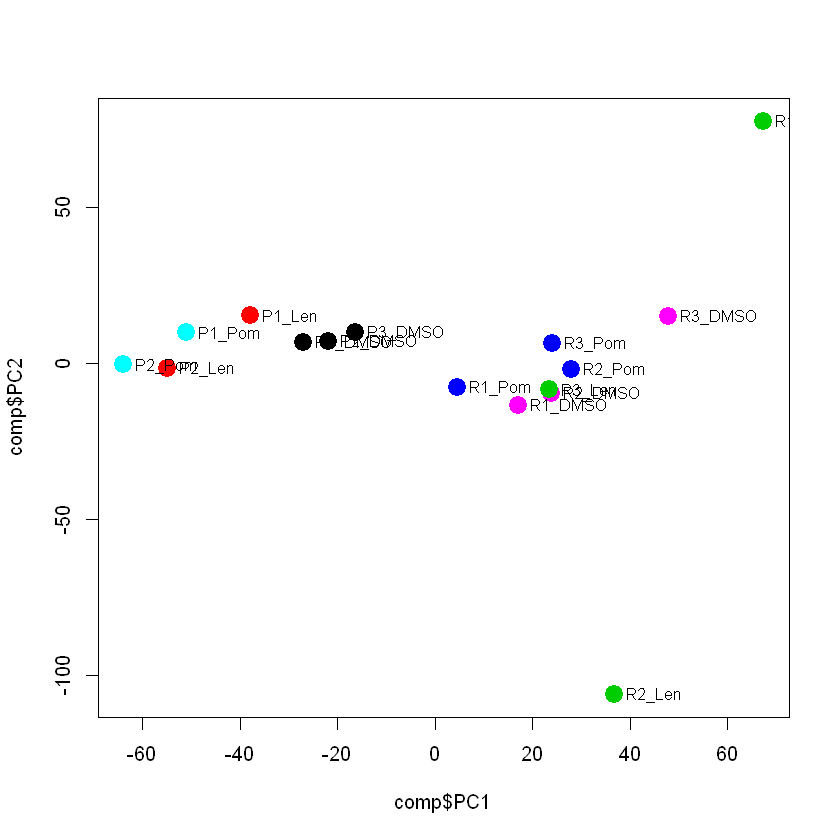

In [107]:
#rv = rowVars(as.matrix(n_data))
#select = order(rv, decreasing=TRUE)[seq_len(5000)]
#n_data1 = n_data[select,]

# PCA
y.pca <- prcomp(t(n_data), center = TRUE, scale = TRUE)
comp <- data.frame(y.pca$x[,1:16])
comp$col = c("#7fc97f", "#7fc97f","#7fc97f",
             "#beaed4", "#beaed4",
             "fdc086", "fdc086",
             "ffff99","ffff99","ffff99",
             "386cb0","386cb0","386cb0",
             "f0027f","f0027f","f0027f")
comp$col = as.factor(comp$col)
#plot3d(comp$PC1, comp$PC2, col = comp$col, cex = 12)
plot(comp$PC1, comp$PC2, col = comp$col, pch=19, cex = 2)
text(comp$PC1, comp$PC2, labels=row.names(comp), cex= 0.8, pos=4)